In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove @mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
test_path = '/content/Reddit_Data.csv'
train_path = '/content/Twitter_Data.csv'
Train_data = pd.read_csv(train_path)
Test_data = pd.read_csv(test_path)
Train_data = Train_data.dropna()
Test_data = Test_data.dropna()

In [ ]:
X_Train = Train_data['clean_text']
y_Train = Train_data['category']
X_Test = Test_data['clean_comment']
y_Test = Test_data['category']

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_Train = vectorizer.fit_transform(X_Train)

In [ ]:
model = LogisticRegression()
model.fit(X_Train, y_Train)

LogisticRegression()

In [ ]:
X_Test = vectorizer.fit_transform(X_Test)
y_pred = model.predict(X_Test)

In [ ]:
print("Classification Report:\n", classification_report(y_Test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          -1       0.27      0.20      0.23      8277
           0       0.49      0.68      0.57     13042
           1       0.54      0.45      0.49     15830

    accuracy                           0.47     37149
   macro avg       0.43      0.44      0.43     37149
weighted avg       0.46      0.47      0.46     37149



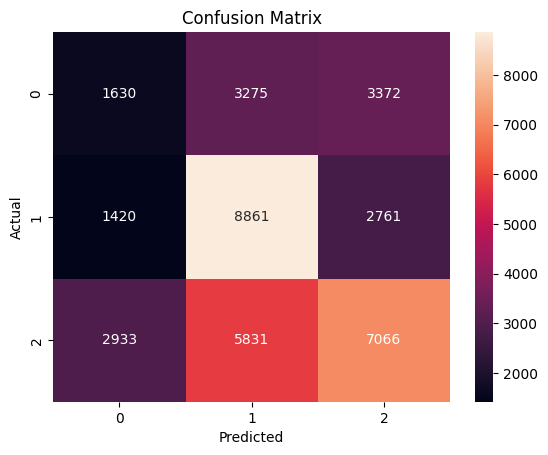

In [ ]:
cm = confusion_matrix(y_Test, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()